## Семинар 4: "Сверточные сети"

ФИО: 

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
from IPython.display import clear_output
%matplotlib inline

### Часть 1: Свертка

#### Одномерные сигналы
Начнем с одномерных сигналов — например, это могут быть различные временные ряды. 

<i>1.1 Реализуйте функцию, вычисляющую одномерную свертку.</i>

In [2]:
\лизовать свертку без отступов, т.е. 
    #   размер результирующего сигнала должен быть меньше входного.
    
    for i in range(signal_convolved.shape[0]):
        signal_convolved[i] = np.sum(kernel[::-1] * signal[i:i+len(kernel)])
    
    """
    kernel_h = len(kernel) // 2
    for i in range(kernel_h, signal.shape[0] - kernel_h):
        k = i - kernel_h
        signal_convolved[k] = np.sum(kernel[::-1] * signal[i-kernel_h:i+kernel_h+1])
    """
        
    return signal_convolved


Проверим правильность реализации, сравнив с реализацией из scipy

In [3]:
from scipy.signal import convolve

signal = np.random.rand(100)
kernel = np.random.rand(5)
t_result = t_convolve(signal, kernel)
b_result = convolve(signal, kernel, mode='valid')

np.testing.assert_allclose(t_result, b_result)

Посмотрим как операция свертки может помочь нам убрать шум из сигнала

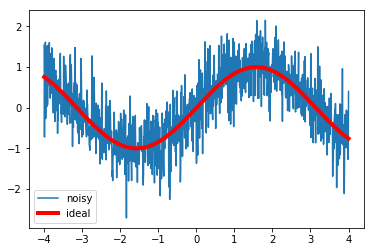

In [4]:
x = np.linspace(-4, 4, 1000)
signal = np.sin(x)
noisy_signal = signal + np.random.randn(signal.shape[0])*0.5
plt.plot(x, noisy_signal, label='noisy')
plt.plot(x, signal, 'r', label='ideal', linewidth=4)
plt.legend(loc=0)

Для подавления шума можно использовать усреднение значений сигнала в окрестности каждой точки (см. ЗБЧ). Вы можете убедиться, что такая операция может быть реализована при помощи свертки данных с ядром, $[\frac 1w, \frac 1w, ..., \frac 1w]$, где $w$ — размер окна.

<i>1.2  Вычислите свертку <b>зашумленного</b> сигнала с ядром $[0.2, 0.2, 0.2, 0.2, 0.2]$ </i>

In [5]:
kernel = np.ones(71)
kernel /= kernel.shape[0]

denoised_signal = convolve(noisy_signal, kernel, 'same')

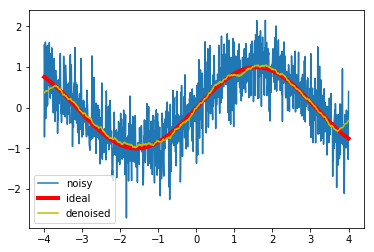

In [6]:
x = np.linspace(-4, 4, 1000)
plt.plot(x, noisy_signal, label='noisy')
plt.plot(x, signal, 'r', label='ideal', linewidth=4)
plt.plot(x, denoised_signal, 'y', label='denoised')
plt.legend(loc=0)

Заметим, что уровень шума значительно снизился! Попробуйте подобрать такую ширину окна, чтобы востановленный сигнал был наиболее похож на исходный.

<i> 1.3 Подберите размер окна <i>

In [7]:
for size in range(3, 999, 2):
    kernel = np.ones(size)
    kernel /= kernel.shape[0]

    denoised_signal = convolve(noisy_signal, kernel, 'same')    
    error = ((signal - denoised_signal)**2).mean()
    
    print("ks = {}, error = {}".format(size, error))

ks = 3, error = 0.08957910292431555
ks = 5, error = 0.05587790584676322
ks = 7, error = 0.04008466047202418
ks = 9, error = 0.030583417128258697
ks = 11, error = 0.024725312528115793
ks = 13, error = 0.02086866738679813
ks = 15, error = 0.018088049303589517
ks = 17, error = 0.016019497858317903
ks = 19, error = 0.014415809021758732
ks = 21, error = 0.013084734020612228
ks = 23, error = 0.01210492518536023
ks = 25, error = 0.01114211918347845
ks = 27, error = 0.010197477552580644
ks = 29, error = 0.009338774760206732
ks = 31, error = 0.008653342379905385
ks = 33, error = 0.008078181429860045
ks = 35, error = 0.007613603794590732
ks = 37, error = 0.007297917543485953
ks = 39, error = 0.007079046695169281
ks = 41, error = 0.006890739773201227
ks = 43, error = 0.006671961101757277
ks = 45, error = 0.006458703425522424
ks = 47, error = 0.006275901384512186
ks = 49, error = 0.00611306817032505
ks = 51, error = 0.00597016136275494
ks = 53, error = 0.005896027049612899
ks = 55, error = 0.00585

ks = 867, error = 0.4461906558368976
ks = 869, error = 0.44698158180650854
ks = 871, error = 0.44776485364104185
ks = 873, error = 0.44854013001345994
ks = 875, error = 0.44931068241245614
ks = 877, error = 0.4500717902638314
ks = 879, error = 0.4508234494719208
ks = 881, error = 0.4515658663643411
ks = 883, error = 0.4522993096557487
ks = 885, error = 0.45302187235099617
ks = 887, error = 0.4537348366412722
ks = 889, error = 0.45444003030899877
ks = 891, error = 0.4551364226467839
ks = 893, error = 0.4558226968178401
ks = 895, error = 0.45650129195513983
ks = 897, error = 0.457169057587246
ks = 899, error = 0.4578266271936227
ks = 901, error = 0.4584770403557269
ks = 903, error = 0.4591179890736707
ks = 905, error = 0.4597518676382414
ks = 907, error = 0.46037624395405785
ks = 909, error = 0.46099321952710265
ks = 911, error = 0.4615988732402041
ks = 913, error = 0.46219367698471564
ks = 915, error = 0.4627806645304644
ks = 917, error = 0.46335867980841305
ks = 919, error = 0.46392770

#### Многомерные сигналы
Перейдем теперь к черно-белым и цветным изображениям. Для ЧБ изображений имеем двумерный сигнал, для цветных — трехмерный (высота x ширина x каналы).

Для цветных изображений количество каналов ядра обычно совпадает с количеством каналов изображения. Таким образом, в результате получается черно-белое изображение.

<i>Для вычисления многомерных сверток используйте функцию convolve из from scipy.signal import convolve</i>

In [8]:
image = plt.imread('image.jpg')

In [9]:
image.shape

(278, 501, 3)

<i>1.4 Найдите в вашей любимой поисковой системе веса каналов для перевода цветного изображения в черно-белое. Постройте фильтр, который будет переводить цветное изображение в ЧБ</i>

In [10]:
color_to_bw = np.array([0.2989, 0.5870, 0.1140])

<i>1.5 На примере любого цветного изображения покажите результат его свертки с фильтром из предыдущего задания.</i>

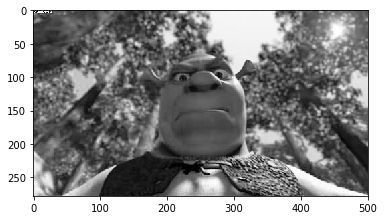

In [11]:
bw_image = convolve(image.flatten(), color_to_bw, 'same')[::3].reshape(*image.shape[:2])
convolve(noisy_signal, kernel, 'same')
# Не забудьте, что размер bw_image должен быть [w,h], а convolve вам вернет [w,h,1]
plt.imshow(bw_image, cmap=plt.cm.Greys_r)

Операция свертки также позволяет находить границы на изображении. Для этого можно использовать, например, фильтр Собеля.

<i>1.6 Задайте ядро <a href="https://ru.wikipedia.org/wiki/Оператор_Собеля">фильтра Собеля</a> и продемонстрируйте результат его применения к любому цветному изображению.</i>

In [12]:
from scipy.signal import convolve2d

kernel = np.array([[-1, -2, -1],
                   [0,   0,  0],
                   [+1, +2, +1]])

res_y = convolve2d(bw_image, kernel.T, 'same')
res_x = convolve2d(bw_image, kernel, 'same')

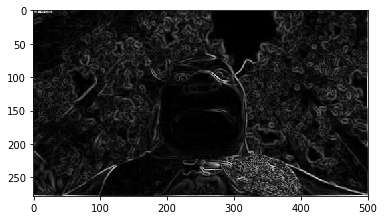

In [13]:
plt.imshow((res_x**2 + res_y**2)**0.5, cmap=plt.cm.Greys_r)

В сверточных нейронных сетях каждый слой использует несколько фильтров. Допустим, у нас было изображение с тремя каналами (количество входных каналов). Рассмотрим банк из четырех фильтров (количество выходных каналов). Тогда изначально будет вычислена свертка с каждым фильтром — получим 4 ЧБ изображения. Теперь соединим их в одно, интерпретируя каждое ЧБ изображение как канал цветного: RGB$\alpha$.

<i>1.7 Реализуйте операцию свертки с банком фильтров (filter bank).</i>

In [14]:
#[10, 30, 3] -> [10, 30, 4]
#[3, 3, 3, 4]

def t_convolve_bank(signal, kernel):
    assert signal.shape[-1] == kernel.shape[0]
    
    res = []
    for i in range(kernel.shape[-1]):
        r = np.zeros_like(signal[:, :, i])
        for j in range(signal.shape[-1]):
            r += convolve2d(signal[:, :, j], kernel[j, :, :, i], 'same')            
        
        res.append(r)
    
    return np.array(res).transpose((1, 2, 0))

<i>1.8 Задайте банк фильтров, меняющий порядок следования каналов с RGB на BGR.</i>

In [15]:
#RGB -> RBG

kernels = np.zeros((3, 1, 1, 3))

kernels[0, 0, 0, 2] = 1
kernels[1, 0, 0, 1] = 1
kernels[2, 0, 0, 0] = 1

<i>1.9 Продемонстрируйте результат свертки любого цветного изображения с банком фильтров из предыдущего пункта.</i>

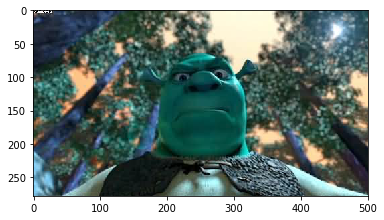

In [16]:
res_image = t_convolve_bank(image.astype(float), kernels)
plt.imshow(res_image.astype('uint8'))

# Не забудьте, что после свертки вы скорее всего получите тензор типа float. 
# Чтобы imshow нормально отобразил результат, надо привести его к типу uint8 (нпр., при помощи .astype('uint8'))

В процессе обучения сверточных нейронных сетей настраиваются веса элементов фильтр банка. Это позволяет не заниматься подбором коэффициентов "руками", а задавать лишь размер ядра: ширину, высоту, количество входных и выходных каналов. В итоге получаем четырехмерный массив (тензор).

### Часть 2: Пулинг

При использовании сверточных слоев принято использовать слои пулинга. Эта операция позволяет уменьшить пространственные размерности изображения и избавиться от избыточности.

<i>2.1 Реализуйте операции пулинга для цветных изображений</i>

In [17]:
def maxpool(image, w=2):
    assert(image.ndim == 3)
    
    res = np.zeros((image.shape[0] // w, image.shape[1] // w, image.shape[2]))
    for i in range(0, image.shape[0] - w, w):
        for j in range(0, image.shape[1] - w, w):
            for k in range(image.shape[2]):
                res[i//w, j//w, k] = np.max(image[i:i+w, j:j+w, k])  
    return res

def medianpool(image, w=2):
    assert(image.ndim == 3)
    
    res = np.zeros((image.shape[0] // w, image.shape[1] // w, image.shape[2]))
    for i in range(0, image.shape[0] - w, w):
        for j in range(0, image.shape[1] - w, w):
            for k in range(image.shape[2]):
                res[i//w, j//w, k] = np.median(image[i:i+w, j:j+w, k])
    return res

Как и в первой части, посмотрим сначала как эта опреация влияет на цветные изображения.

<i>2.2 Взять цветное изображение и добавить к нему <a href="https://ru.wikipedia.org/wiki/Salt_and_pepper"> шум соль и перец</a>. Применить медианный пулинг и максимальный пулинг.</i>

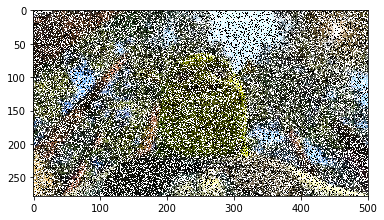

In [18]:
frac = 0.7

res_image = np.array(image)

ind = np.random.rand(*image.shape[:2]) > frac
res_image[ind, :] = 0

ind = np.random.rand(*image.shape[:2]) > frac
res_image[ind, :] = 255

plt.imshow(res_image.astype('uint8'))

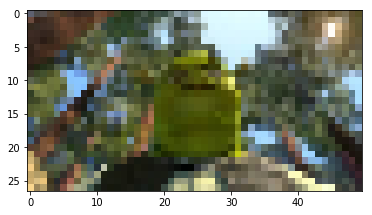

In [19]:
clean_image = medianpool(res_image.astype(float), 10)
plt.imshow(clean_image.astype('uint8'))

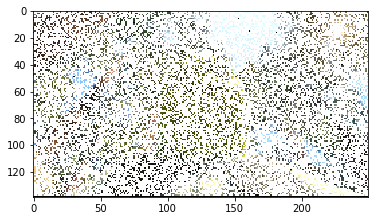

In [20]:
res_image = maxpool(res_image.astype(float))
plt.imshow(res_image.astype('uint8'))

<i>2.3 Какой тип пулинга лучше справился с поставленной задачей? Почему?</i>

Лучше справился медианный пулинг, потому что он учитывает все значения пикселей в некотором радиусе в отличие от максимального пулинга, учитывающего только максимальное значение в некоторой области.

### Часть 3: Сверточная сеть на pyTorch

pyTorch предоставляет модули свертки и пулинга. Попробуем построить сеть и натренировать ее на данных MNIST. Для загрузки данных воспользуйтесь кодом со второго семинара.

Воспользуемся кодом с предыдущего семинара, чтобы обучить сверточную сеть на данных MNIST. Попробуем две архитектуры: 
2. input -> 8 Conv 3x3 -> ReLU -> maxpool -> 16 Conv 3x3 -> ReLU -> ravel -> Linear -> LogSoftmax
1. input -> 8 Conv 3x3 -> ReLU -> 16 Conv 3x3 -> ReLU -> maxpool -> 32 Conv 3x3 -> ravel -> Linear -> LogSoftmax

Здесь запись "c conv KxK" означает то, что на выходе должно получиться c каналов, а размер ядра — KxK

Ниже приведен пример сети. <i>(Документация: http://pytorch.org/docs/)</i>

In [21]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [22]:
# пример сверточной сети

image_size = 28
channels = 1
class ConvClassifier(nn.Module):
    def __init__(self, image_size):
        super().__init__()
        self.conv_layers = nn.Sequential(nn.Conv2d(channels, 3, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2))
        self.linear_layers = nn.Sequential(nn.Linear(image_size//2*image_size//2*3, 10), nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [23]:
def train(network, epochs, learning_rate):
    loss = nn.NLLLoss()
    optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)
    train_loss_epochs = []
    test_loss_epochs = []
    train_accuracy_epochs = []
    test_accuracy_epochs = []
    try:
        for epoch in range(epochs):
            losses = []
            accuracies = []
            for X, y in train_loader:
                network.zero_grad()
                prediction = network(X)
                loss_batch = loss(prediction, y)
                losses.append(loss_batch.item())
                loss_batch.backward()
                optimizer.step()
                accuracies.append((np.argmax(prediction.data.numpy(), 1)==y.data.numpy()).mean())
            train_loss_epochs.append(np.mean(losses))
            train_accuracy_epochs.append(np.mean(accuracies))
            losses = []
            accuracies = []    
            for X, y in test_loader:
                prediction = network(X)
                loss_batch = loss(prediction, y)
                losses.append(loss_batch.item())
                accuracies.append((np.argmax(prediction.data.numpy(), 1)==y.data.numpy()).mean())
            test_loss_epochs.append(np.mean(losses))
            test_accuracy_epochs.append(np.mean(accuracies))
            clear_output(True)
            print('\rEpoch {0}... (Train/Test) NLL: {1:.3f}/{2:.3f}\tAccuracy: {3:.3f}/{4:.3f}'.format(
                        epoch, train_loss_epochs[-1], test_loss_epochs[-1],
                        train_accuracy_epochs[-1], test_accuracy_epochs[-1]))
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(train_loss_epochs, label='Train')
            plt.plot(test_loss_epochs, label='Test')
            plt.xlabel('Epochs', fontsize=16)
            plt.ylabel('Loss', fontsize=16)
            plt.legend(loc=0, fontsize=16)
            plt.grid()
            plt.subplot(1, 2, 2)
            plt.plot(train_accuracy_epochs, label='Train accuracy')
            plt.plot(test_accuracy_epochs, label='Test accuracy')
            plt.xlabel('Epochs', fontsize=16)
            plt.ylabel('Loss', fontsize=16)
            plt.legend(loc=0, fontsize=16)
            plt.grid()
            plt.show()
    except KeyboardInterrupt:
        pass

Epoch 4... (Train/Test) NLL: 0.255/0.231	Accuracy: 0.926/0.933


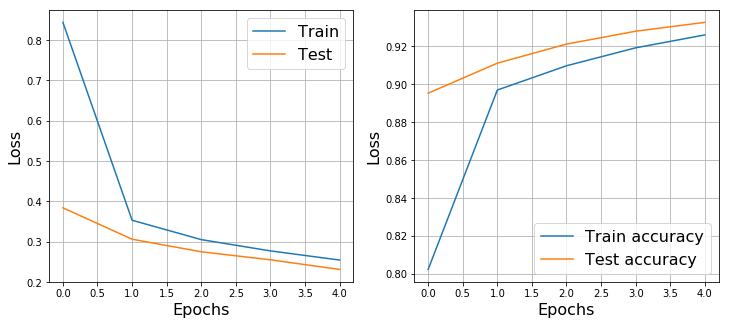

In [24]:
network = ConvClassifier(image_size=28)
train(network, 5, 1e-4)

<i>3.1 Обучите сверточные сети с архитектурами (1) и (2). Какое качество удалось получить на тестовой выборке? Какой результат получался на полносвязной нейронной сети?</i>

In [25]:
class ConvClassifier_1(nn.Module):
    def __init__(self, image_size):
        super().__init__()
        self.conv_layers = nn.Sequential(nn.Conv2d(1, 8, (3, 3), padding=1), nn.ReLU(),
                                         nn.MaxPool2d(2),
                                         nn.Conv2d(8, 16, (3, 3), padding=1), nn.ReLU())
        self.linear_layers = nn.Sequential(nn.Linear(image_size//2*image_size//2*16, 10), nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

Epoch 4... (Train/Test) NLL: 0.079/0.065	Accuracy: 0.977/0.980


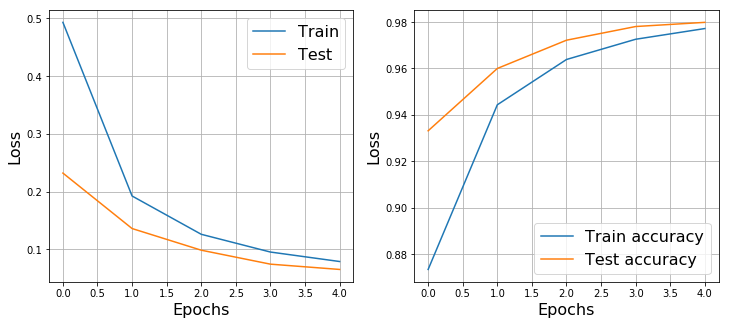

In [26]:
network_1 = ConvClassifier_1(image_size=28)
train(network_1, 5, 1e-4)

In [27]:
class ConvClassifier_2(nn.Module):
    def __init__(self, image_size):
        super().__init__()
        self.conv_layers = nn.Sequential(nn.Conv2d(1, 8, (3, 3), padding=1), nn.ReLU(),
                                         nn.Conv2d(8, 16, (3, 3), padding=1), nn.ReLU(),
                                         nn.MaxPool2d(2),
                                         nn.Conv2d(16, 32, (3, 3), padding=1))
        self.linear_layers = nn.Sequential(nn.Linear(image_size//2*image_size//2*32, 10), nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

Epoch 4... (Train/Test) NLL: 0.060/0.053	Accuracy: 0.982/0.983


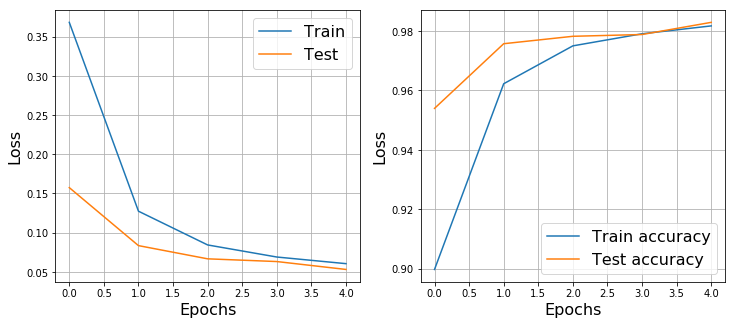

In [28]:
network_2 = ConvClassifier_2(image_size=28)
train(network_2, 5, 1e-4)

<i>3.2 На каких объектах сеть ошибается сильнее всего? Нарисуйте эти объекты с правильными и предсказаными метками.</i>

In [29]:
def print_worst(count_of_bad_predictions, loader, network, loss=nn.NLLLoss()):
    losses = []
    accuracies = []
    list_X = []
    list_y = []
    
    for X, y in s_test_loader:
        prediction = network(X)
        loss_batch = loss(prediction, y)
        losses.append(loss_batch.item())
        list_X.append(X)
        list_y.append(y[0])
        
    data_y = np.array(list_y)
    losses = np.array(losses)
    
    ind = losses.argsort()[-count_of_bad_predictions:]
    worst_targets = data_y[ind]
    worst_X = []

    for index in ind:
        worst_X.append(list_X[index].numpy())
    worst_X = np.array(worst_X)
    
    worst_predictions = []
    worst_images = np.zeros((count_of_bad_predictions, 784))

    for index in ind:
        worst_predictions.append(np.argmax(network.forward(list_X[index]).data.numpy(), 1))

    worst_images[np.arange(count_of_bad_predictions), :] = worst_X[np.arange(count_of_bad_predictions), 
                                                                   0].reshape(count_of_bad_predictions, 784)
    
    plt.figure(figsize=(16, 17))
    for i in range(count_of_bad_predictions):
        plt.subplot(4, 3, i+1)
        plt.imshow(worst_images[i].reshape(28, 28), cmap=plt.cm.Greys_r)
        plt.title("true: %s        pred: %s" % (str(worst_targets[i]), str(worst_predictions[i][0])))
        plt.axis('off')

In [30]:
new_test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

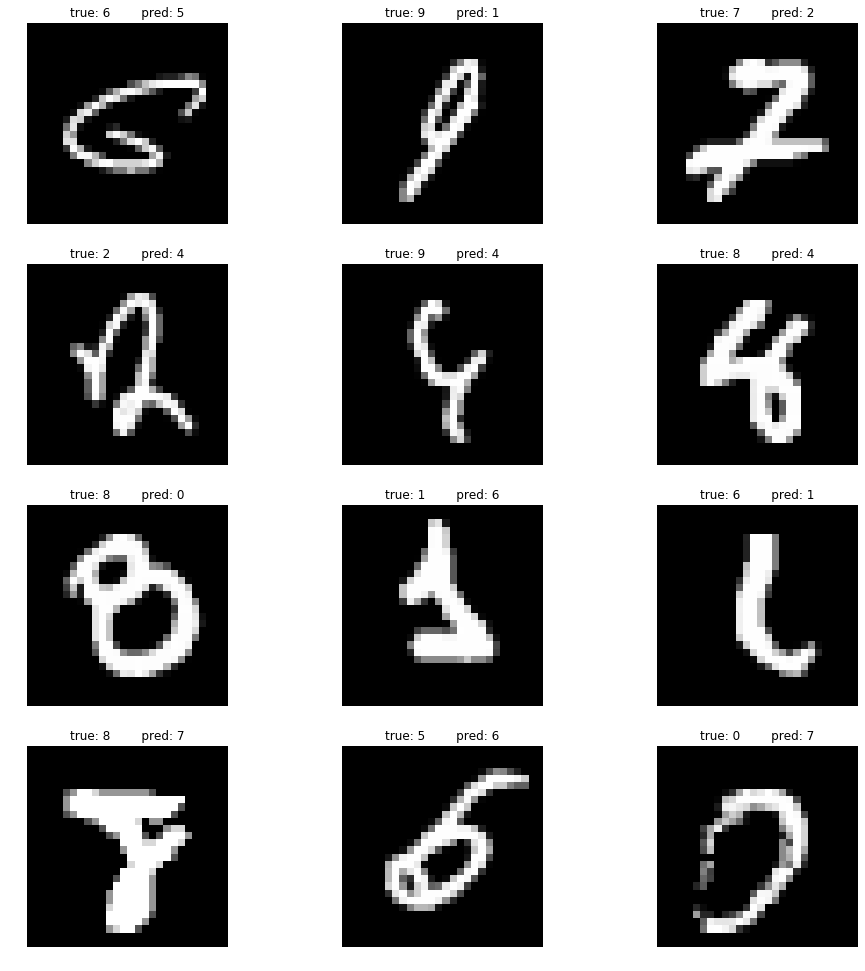

In [31]:
print_worst(12, new_test_loader, network_1, nn.NLLLoss())

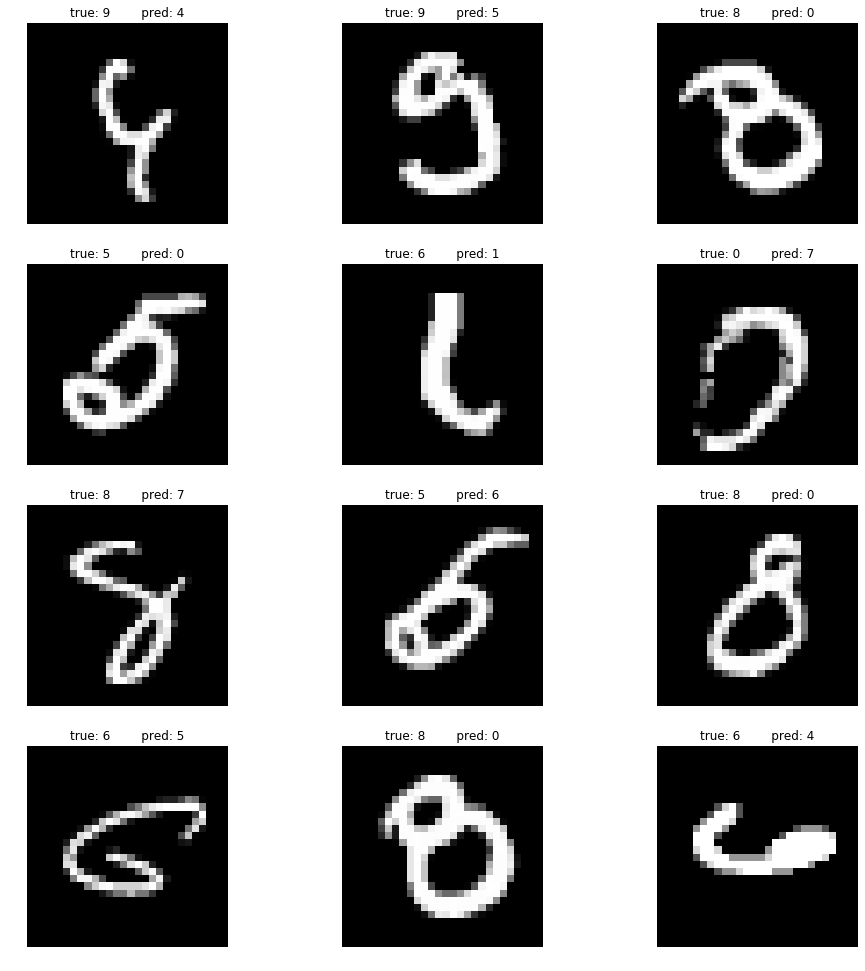

In [32]:
print_worst(12, new_test_loader, network_2, nn.NLLLoss())

<i>3.3 Поэкспериментируйте с различными архитектурами сверточных сетей. Смогли ли вы улучшить результат на тестовой выборке?</i>

In [33]:
class ConvClassifier_3(nn.Module):
    def __init__(self, image_size):
        super().__init__()
        self.conv_layers = nn.Sequential(nn.Conv2d(1, 2, (3, 3), padding=1), nn.ReLU(),
                                         nn.Conv2d(2, 4, (3, 3), padding=1), nn.ReLU(),
                                         nn.Conv2d(4, 8, (3, 3), padding=1), nn.ReLU(),
                                         nn.Conv2d(8, 16, (3, 3), padding=1), nn.ReLU(),
                                         nn.MaxPool2d(2),
                                         nn.Conv2d(16, 32, (3, 3), padding=1))
        self.linear_layers = nn.Sequential(nn.Linear(image_size//2*image_size//2*32, 10), nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

Epoch 4... (Train/Test) NLL: 0.092/0.078	Accuracy: 0.972/0.975


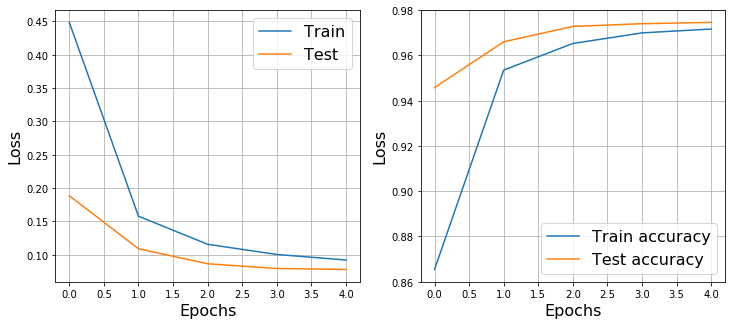

In [34]:
network_3 = ConvClassifier_3(image_size=28)
train(network_3, 5, 1e-4)

In [35]:
class ConvClassifier_4(nn.Module):
    def __init__(self, image_size):
        super().__init__()
        self.conv_layers = nn.Sequential(nn.Conv2d(1, 8, (3, 3), padding=1), nn.ELU(),
                                         nn.Conv2d(8, 16, (3, 3), padding=1), nn.ELU(),
                                         nn.MaxPool2d(2),
                                         nn.Conv2d(16, 32, (3, 3), padding=1), nn.ELU(),
                                         nn.MaxPool2d(2),
                                         nn.Conv2d(32, 64, (3, 3), padding=1))
        self.linear_layers = nn.Sequential(nn.Linear(image_size//2*image_size//2*16, 10), nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

Epoch 4... (Train/Test) NLL: 0.052/0.047	Accuracy: 0.984/0.984


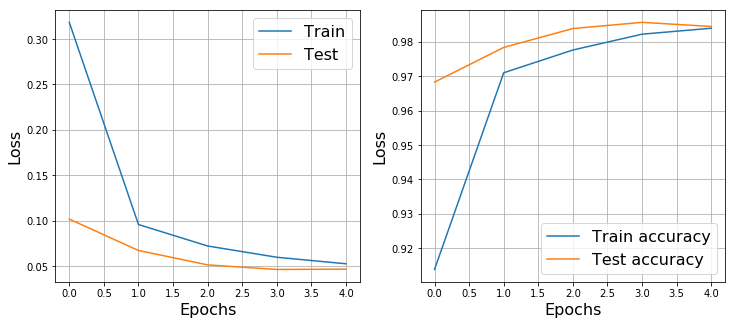

In [36]:
network_4 = ConvClassifier_4(image_size=28)
train(network_4, 5, 1e-4)

In [37]:
class ConvClassifier_5(nn.Module):
    def __init__(self, image_size):
        super().__init__()
        self.conv_layers = nn.Sequential(nn.Conv2d(1, 4, (3, 3), padding=1), nn.Tanh(),
                                         nn.MaxPool2d(2),
                                         nn.Conv2d(4, 8, (3, 3), padding=1), nn.Tanh(),
                                         nn.Conv2d(8, 16, (3, 3), padding=1))
        self.linear_layers = nn.Sequential(nn.Linear(image_size//2*image_size//2*16, 10), nn.LogSoftmax(dim=1))

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

Epoch 4... (Train/Test) NLL: 0.347/0.321	Accuracy: 0.898/0.906


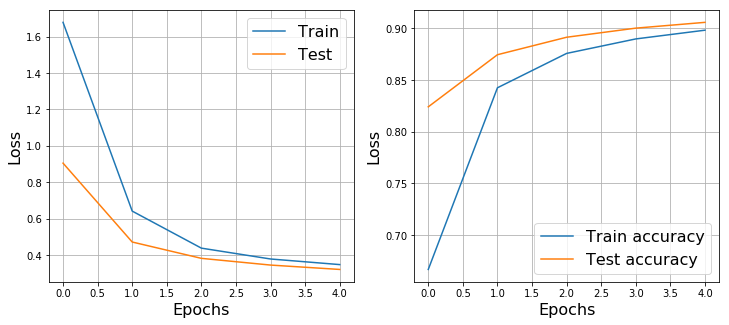

In [38]:
network_5 = ConvClassifier_5(image_size=28)
train(network_5, 5, 1e-5)

Epoch 9... (Train/Test) NLL: 0.042/0.073	Accuracy: 0.987/0.977


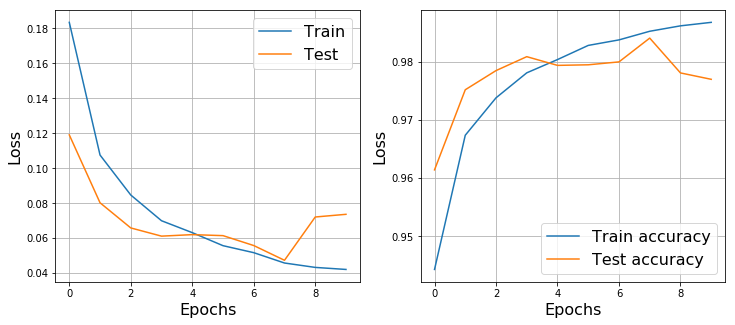

In [39]:
network_6 = ConvClassifier_4(image_size=28)
train(network_5, 10, 1e-3)

Результат удалось улучшить нейронной сетью с архитектурой:

input -> 8 Conv 3x3 -> ELU -> 16 Conv 3x3 -> maxpool -> 32 Conv 3x3 -> ELU -> maxpool -> 64 Conv 3x3 -> ravel -> Linear ->LogSoftmax

(Train/Test) NLL: 0.052/0.047

#### Feedback (опционально)

Здесь вы можете оставить список опечаток из лекции или семинара:

Здесь вы можете оставить комментарии по лекции или семинару: